# New York City taxy data set - Data Analysis


1. Brief description of the data set and a summary of its attributes
2. Initial plan for data exploration
3. Actions taken for data cleaning and feature engineering
4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
5. Formulating at least 3 hypothesis about this data
6. Conducting a formal significance test for one of the hypotheses and discuss the results 
7. Suggestions for next steps in analyzing this data
8. A paragraph that summarizes the quality of this data set and a request for additional data if needed

#### Import the required libraries we need for the lab.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import graph_utils as gu
import data_utils as du

#### Load the data set

In [7]:
# Load the dataset
data = pd.read_csv('nyc.csv')

## 1 - Brief description of the data set and a summary of its attributes

In [8]:
# Display the first few rows of the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Summary of attributes
print("Summary of attributes:")
data.info()

# Step 3: Missing Values Check
print("\nMissing Values:")
data.isnull().sum()


Summary of attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB

Missing Values:


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

There is no missing value in the data set.

In [14]:
## Summary Statistics
print("Summary Statistics:")
data.describe()

Summary Statistics:


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


A few insights:
- There are approximately **1,458,644** records in the dataset
- Only 2 Vendors, recoded as "1" and "2"
- Passenger Count: The mean passenger_count is approximately 1.66, with a standard deviation of 1.31. Most trips have **1-2 passengers**, but there are trips with **up to 9 passengers**. This needs to be investigated
- Geographical Coordinates: these seem to be centered around **-74 longitude and 41 latitude** which is New York City. A geo plot would verify it.
- Trip Duration: The mean trip_duration is approximately 959.49 seconds (about **16 minutes**).
There's a wide range in trip duration, with a minimum of **1 second** (very unlikely) and a maximum of 3,526,282 seconds (about 978 hours, **almost 41 days**, which is not feasible). The standard deviation is quite high (5,237.43 seconds), indicating significant variability in trip durations.

## 2. Initial plan for data exploration

Given the data insights mentioned above, the data exploraion plan is as following:
- a. investigate number of passengers
- b. investigate trip duration
- c. verify coordinates and their plausibility
- d. investigate time data: convert them for better analysis, introduce new features (likehour of the day, or day of the week, etc.) 
- e. investigate relationship between data

## 3. Data cleaning and feature engineering

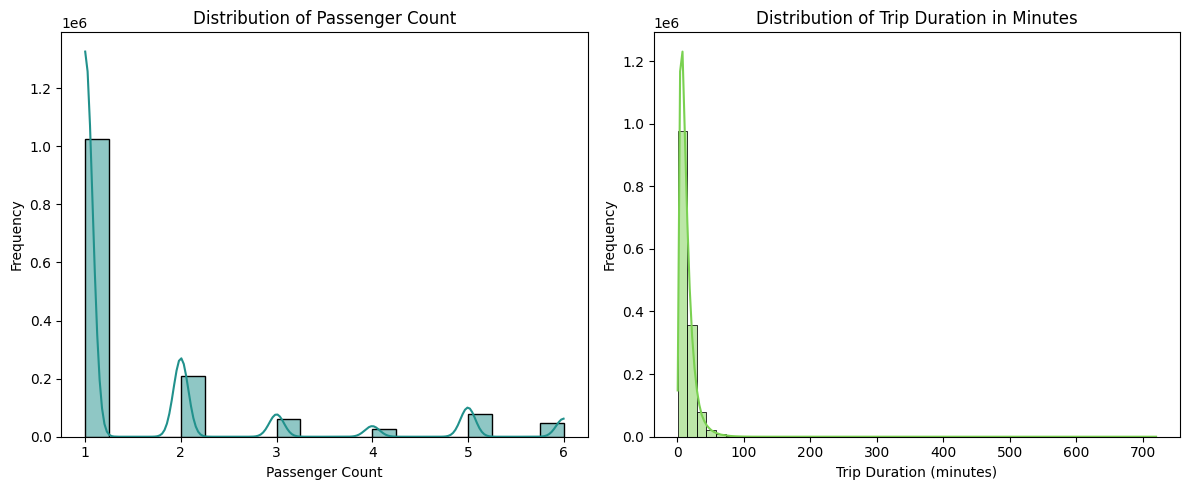

In [27]:
# Convert datetime columns to datetime type for better analysis
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

# Create a new feature for trip duration in minutes
data['trip_duration_minutes'] = data['trip_duration'] / 60

gu.ranges_histo_passenger_trip_duration(data)

As mentioned before, we can eliminate all observations where the passenger number is smaller than 1 or greater than 6.

In [ ]:
# Clean values for passenger_count that are equal to 0 or greater than 6
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]

# Display cleaned data summary for passenger_count
print("Cleaned summary for passenger_count:")
data['passenger_count'].describe()

Cleaned summary for passenger_count:


count    1.446869e+06
mean     1.665474e+00
std      1.314802e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

Now we look at the trip duration and eliminate all outliers

d:\Carlo\python\DataVisualization\cdrNYCtaxyEDA\graph_utils.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))


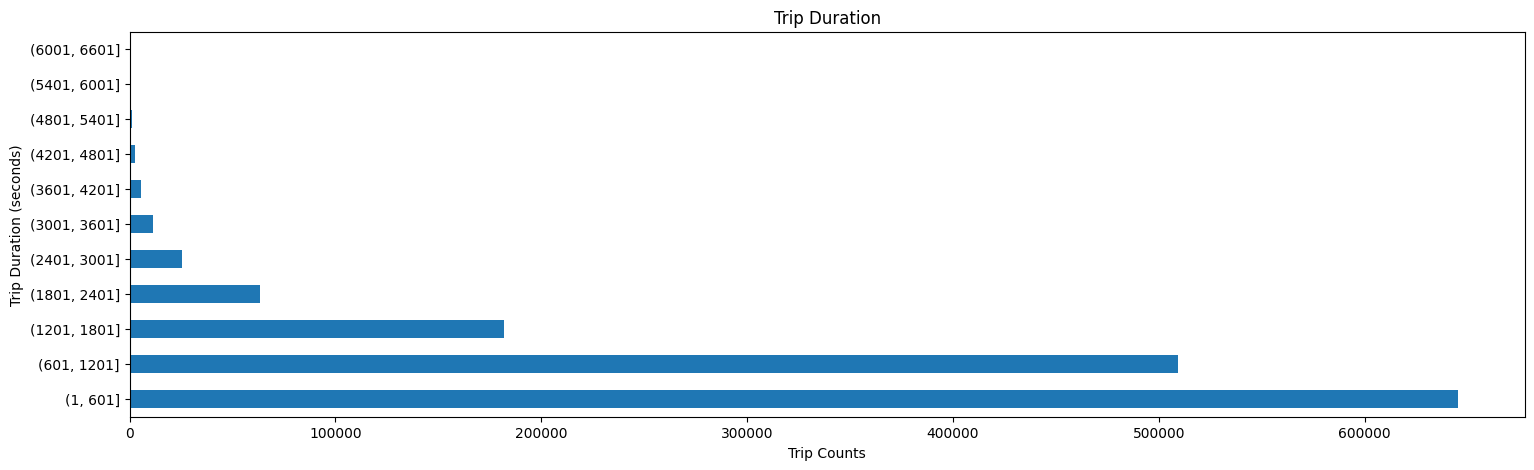

d:\Carlo\python\DataVisualization\cdrNYCtaxyEDA\data_utils.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,max(data.trip_duration),3600))).count())


trip_duration
(1, 3601]         1436741
(3601, 7201]         9877
(7201, 10801]         136
(10801, 14401]         34
(14401, 18001]          4
(18001, 21601]         11
(21601, 25201]         10
(25201, 28801]         13
(28801, 32401]         16
(32401, 36001]          8
(36001, 39601]         13
Name: trip_duration, dtype: int64
Initial summary for trip_duration_minutes:
count    1.446869e+06
mean     1.403717e+01
std      1.154956e+01
min      1.000000e+00
25%      6.683333e+00
50%      1.108333e+01
75%      1.791667e+01
max      7.196167e+02
Name: trip_duration_minutes, dtype: float64
Cleaned summary for trip_duration_minutes:
count    1.446869e+06
mean     1.403717e+01
std      1.154956e+01
min      1.000000e+00
25%      6.683333e+00
50%      1.108333e+01
75%      1.791667e+01
max      7.196167e+02
Name: trip_duration_minutes, dtype: float64


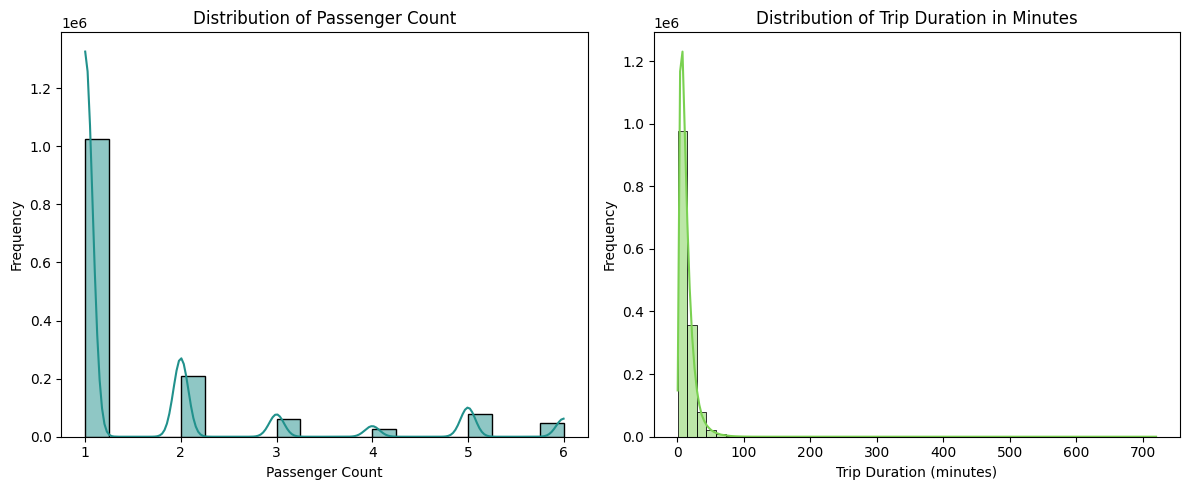

In [31]:
gu.plot_duration(data)
# Clean values for trip_duration that are less than 1 minute or greater than 12 hours (720 minutes)
data = du.clean_duration(data)
data['trip_duration'].describe()
data['trip_duration_minutes'] = data['trip_duration'] / 60
gu.ranges_histo_passenger_trip_duration(data)

A few plot of the coordinates show the same of the coordinates are not very likely (some are in the ocean, a few far away from NY): we therefore eliminate the outliers.
See also the "geo.py" and the "graph_utils.py" (methods 'city_map' and 'geo_plot') files.

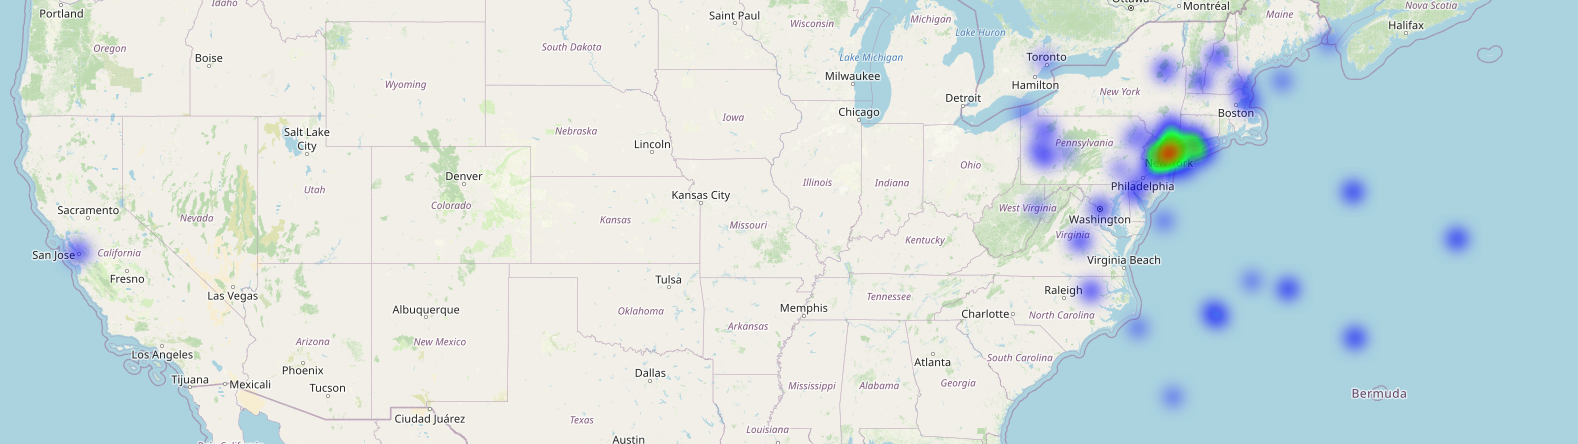

In [22]:
from IPython.display import Image, display
# Display the original folium plot for the coordinates
display(Image(filename='./images/ALL_nyc_taxy_geomap.png'))


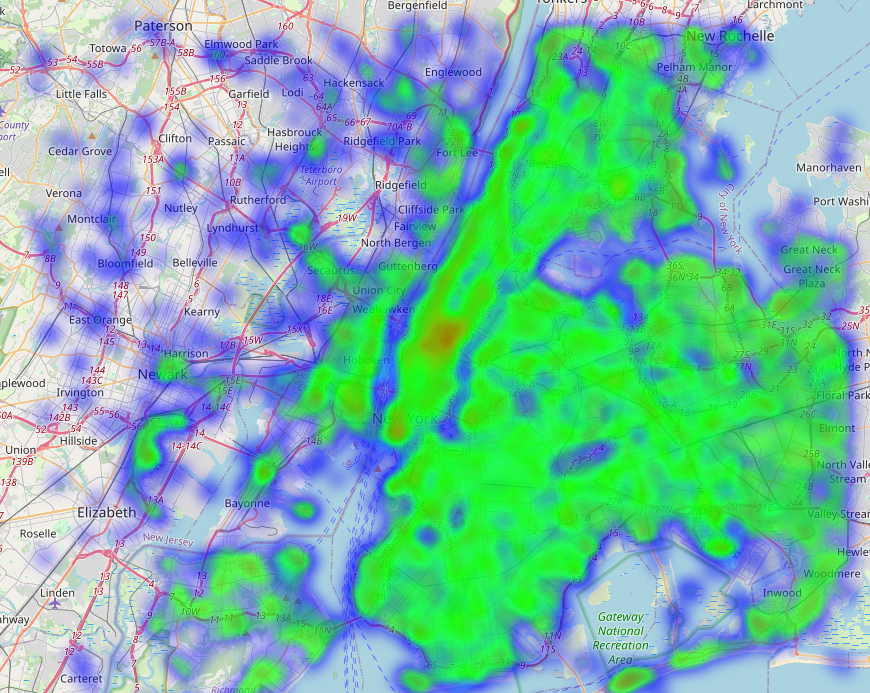

In [24]:
# Define the bounding box for New York City
nyc_bounding_box = {
    "min_longitude": -74.25909,
    "max_longitude": -73.70018,
    "min_latitude": 40.4774,
    "max_latitude": 40.9176
}

# Filter for pickup and dropoff coordinates within the bounding box
data = data[
    (data['pickup_longitude'] >= nyc_bounding_box['min_longitude']) &
    (data['pickup_longitude'] <= nyc_bounding_box['max_longitude']) &
    (data['pickup_latitude'] >= nyc_bounding_box['min_latitude']) &
    (data['pickup_latitude'] <= nyc_bounding_box['max_latitude']) &
    (data['dropoff_longitude'] >= nyc_bounding_box['min_longitude']) &
    (data['dropoff_longitude'] <= nyc_bounding_box['max_longitude']) &
    (data['dropoff_latitude'] >= nyc_bounding_box['min_latitude']) &
    (data['dropoff_latitude'] <= nyc_bounding_box['max_latitude'])
]


# Display the modified folium plot for the coordinates, centered on NYC
display(Image(filename='./images/nyc_taxy_geomap.png'))


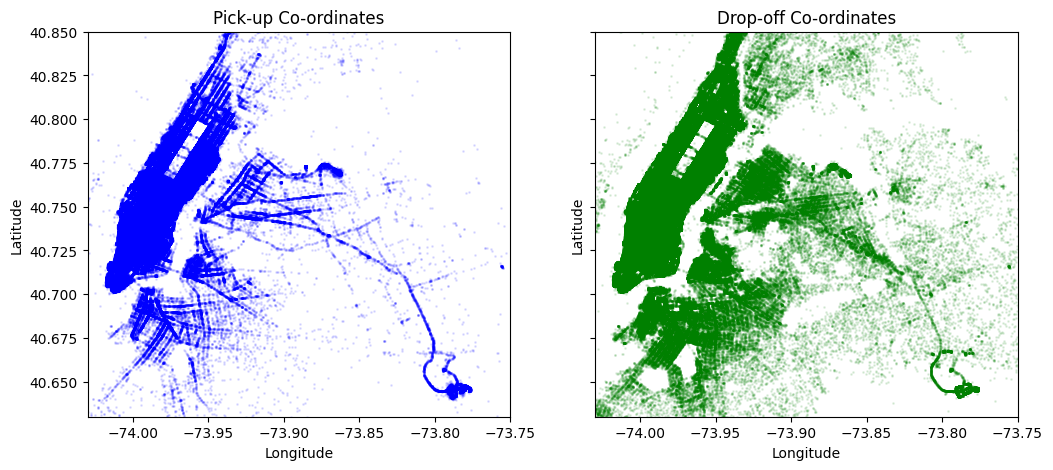

In [25]:
gu.geo_plot(data)

We want to see now the relationship of the date and time values:
- introduce a few new features: weekday, month, pickup_hour
- plot the trips per hour


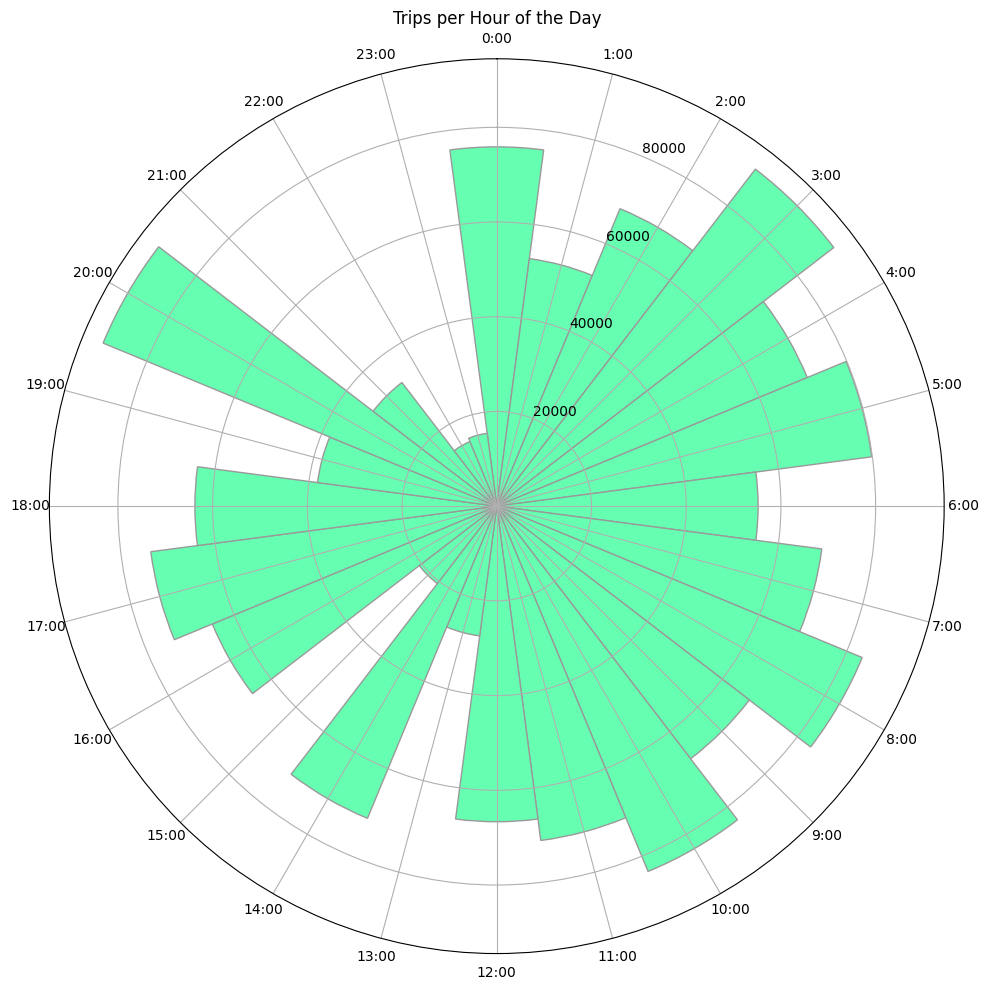

<class 'pandas.core.frame.DataFrame'>
Index: 1446869 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1446869 non-null  object        
 1   vendor_id              1446869 non-null  int64         
 2   pickup_datetime        1446869 non-null  datetime64[ns]
 3   dropoff_datetime       1446869 non-null  datetime64[ns]
 4   passenger_count        1446869 non-null  int64         
 5   pickup_longitude       1446869 non-null  float64       
 6   pickup_latitude        1446869 non-null  float64       
 7   dropoff_longitude      1446869 non-null  float64       
 8   dropoff_latitude       1446869 non-null  float64       
 9   store_and_fwd_flag     1446869 non-null  object        
 10  trip_duration          1446869 non-null  int64         
 11  weekday                1446869 non-null  object        
 12  month                  1446869 no

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday_num,pickup_hour,trip_duration_minutes
count,1.446869e+06,1446869,1446869,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06,1.446869e+06
mean,1.535073e+00,2016-04-01 09:54:30.978177536,2016-04-01 10:08:33.208206848,1.665474e+00,-7.397363e+01,4.075101e+01,-7.397362e+01,4.075181e+01,8.422300e+02,3.516459e+00,3.049625e+00,1.361202e+01,1.403717e+01
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000e+00,-7.425053e+01,4.049620e+01,-7.425867e+01,4.048019e+01,6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2016-02-17 16:32:59,2016-02-17 16:47:34,1.000000e+00,-7.399187e+01,4.073742e+01,-7.399133e+01,4.073595e+01,4.010000e+02,2.000000e+00,1.000000e+00,9.000000e+00,6.683333e+00
50%,2.000000e+00,2016-04-01 16:44:49,2016-04-01 17:03:17,1.000000e+00,-7.398177e+01,4.075414e+01,-7.397978e+01,4.075455e+01,6.650000e+02,4.000000e+00,3.000000e+00,1.400000e+01,1.108333e+01
75%,2.000000e+00,2016-05-15 03:26:55,2016-05-15 03:38:39,2.000000e+00,-7.396746e+01,4.076836e+01,-7.396315e+01,4.076980e+01,1.075000e+03,5.000000e+00,5.000000e+00,1.900000e+01,1.791667e+01
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 00:48:20,6.000000e+00,-7.370492e+01,4.091156e+01,-7.370030e+01,4.091747e+01,4.317700e+04,6.000000e+00,6.000000e+00,2.300000e+01,7.196167e+02
std,4.987685e-01,NaN,NaN,1.314802e+00,3.768564e-02,2.783747e-02,3.461770e-02,3.185733e-02,6.929737e+02,1.681011e+00,1.953749e+00,6.395821e+00,1.154956e+01


In [33]:
############ Pickup_HOUR
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
data['weekday'] = data.pickup_datetime.dt.day_name()
data['month'] = data.pickup_datetime.dt.month
data['weekday_num'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

gu.trips_per_hour(data)

data.info()
data.describe()

let's look at the relationships between features

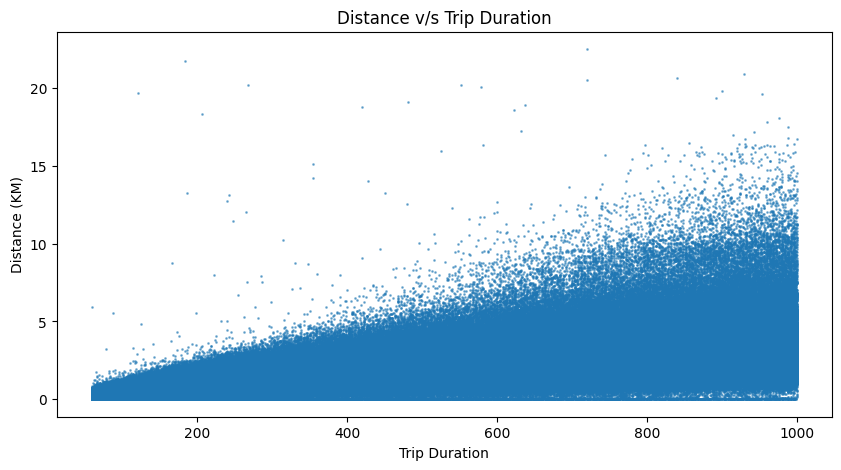

In [35]:
############## DISTANCE

# Apply the function to each row in the dataset: it may takes a few minutes...
data['distance_km'] = data.apply(du.calculate_geodesic_distance, axis=1)

## there should be a linear relationship
gu.trip_duration_vs_distance(data)

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

We create now a heatmap, in order to determine if there is any significant relationship among features.

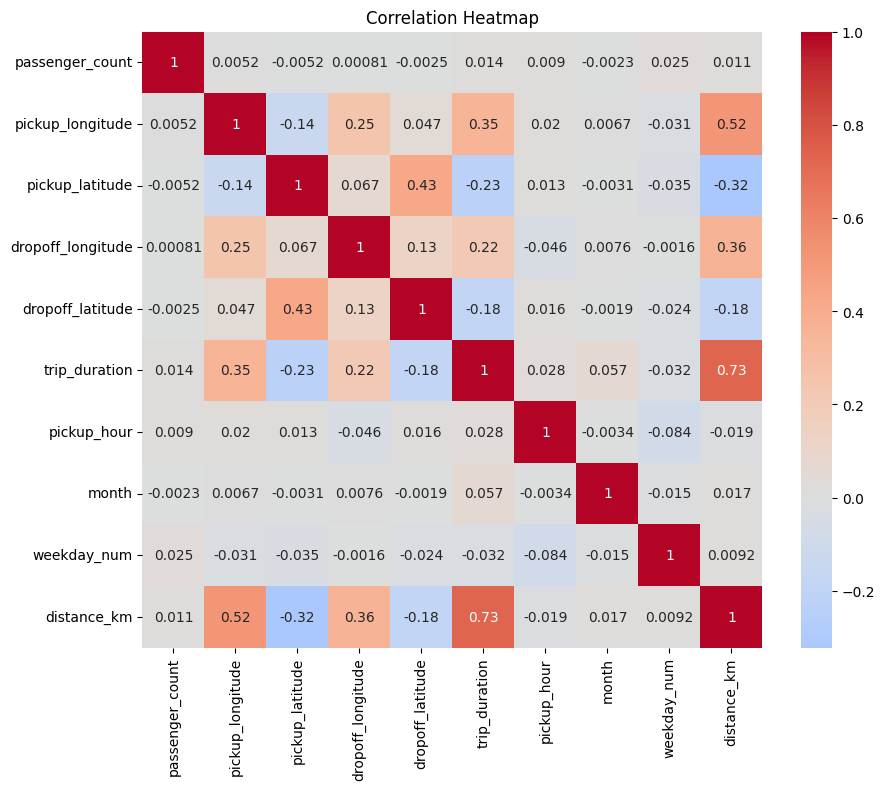

Correlation Values:


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,month,weekday_num,distance_km
passenger_count,1.000000,0.005185,-0.005190,0.000813,-0.002544,0.013635,0.009029,-0.002266,0.025302,0.010639
pickup_longitude,0.005185,1.000000,-0.139986,0.247788,0.046570,0.353015,0.019510,0.006684,-0.030588,0.522036
pickup_latitude,-0.005190,-0.139986,1.000000,0.066961,0.425291,-0.229598,0.013276,-0.003135,-0.034855,-0.321323
dropoff_longitude,0.000813,0.247788,0.066961,1.000000,0.130013,0.218248,-0.045536,0.007634,-0.001569,0.363022
dropoff_latitude,-0.002544,0.046570,0.425291,0.130013,1.000000,-0.183370,0.015760,-0.001910,-0.024460,-0.179763
trip_duration,0.013635,0.353015,-0.229598,0.218248,-0.183370,1.000000,0.027699,0.056956,-0.032133,0.730108
pickup_hour,0.009029,0.019510,0.013276,-0.045536,0.015760,0.027699,1.000000,-0.003363,-0.084142,-0.019196
month,-0.002266,0.006684,-0.003135,0.007634,-0.001910,0.056956,-0.003363,1.000000,-0.014632,0.017493
weekday_num,0.025302,-0.030588,-0.034855,-0.001569,-0.024460,-0.032133,-0.084142,-0.014632,1.000000,0.009184
distance_km,0.010639,0.522036,-0.321323,0.363022,-0.179763,0.730108,-0.019196,0.017493,0.009184,1.000000


In [38]:
# Select relevant columns for correlation analysis
correlation_data = data[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_hour',  'month', 'weekday_num',  'distance_km']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

print("Correlation Values:")
correlation_matrix

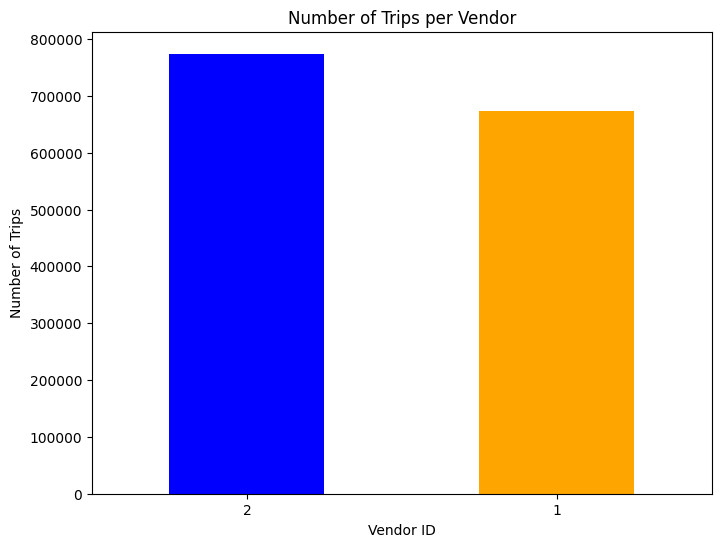

In [40]:
# Count the number of trips per vendor
vendor_trip_counts = data['vendor_id'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 6))
vendor_trip_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Trips per Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


## 4 Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

### Key Findings:

1. **Trip Volume and Vendor Distribution**:
   - The dataset comprises approximately 1.46 million records, highlighting a substantial volume of taxi trips.
   - Trips are fairly balanced between two vendors, with vendor IDs 1 and 2, ensuring a diverse representation of service providers.

2. **Passenger Count**:
   - The average passenger count per trip is 1.67, indicating that most trips involve either solo passengers or two passengers.
   - The distribution ranges from 1 to 6 passengers, with a standard deviation of 1.31, suggesting occasional group trips.

3. **Geographical Coordinates**:
   - The mean pickup and dropoff coordinates are approximately -73.9736 longitude and 40.7510 latitude, centering around New York City.
   - The graphics suggest a large amount of trips from/to Manahattan and from/to the airports.

4. **Trip Duration**:
   - The average trip duration is about 842 seconds (approximately 14 minutes), with significant variability (standard deviation of 693 seconds).
   - Trip durations range from 60 seconds to over 43,000 seconds, indicating a wide spectrum of trip lengths.

5. **Temporal Attributes**:
   - The dataset spans from January 1, 2016, to June 30, 2016, capturing a comprehensive view of six months of taxi trips. 
   - Unfortunately missing other months of the year, it is difficult to estailish the influence of weather and season to the duration of the trip.
   - Time-based features, such as month, day of the week, and hour of the day, provide temporal context for analysis.

### Actionable Insights:

1. **Service Optimization**:
   - Given that the majority of trips have 1-2 passengers, fleet management can focus on optimizing vehicle usage for these passenger counts, potentially reducing operational costs.
   - Analyzing geographical distributions can help identify high-demand areas within NYC, aiding in strategic placement of taxi stands and improving service availability.

2. **Trip Duration Management**:
   - The variability in trip durations suggests the need for better traffic management and route optimization strategies. Implementing real-time traffic data and advanced navigation systems can help in reducing trip times.
   - Addressing trips with extreme durations can provide insights into underlying issues, such as traffic congestion, route inefficiencies, or other delays.

3. **Customer Experience Enhancement**:
   - Understanding the distribution of trip durations and passenger counts can help tailor customer service experiences, such as offering amenities or services that match typical trip lengths.
   - Gathering feedback from passengers experiencing outlier trip durations can identify pain points and areas for improvement.

4. **Correlation Insights**:
   - There is a strong positive correlation between trip duration and distance (0.730108), emphasizing the need for efficient route management.
   - Geographical correlations, such as between pickup and dropoff locations, suggest common travel patterns, which can aid in planning service improvements.

### Summary:
By leveraging these insights, the taxi service can enhance operational efficiencies, optimize marketing strategies, and improve overall customer satisfaction. Analyzing the temporal and geographical attributes further can provide deeper insights into trip patterns and demand fluctuations.
A complete anaylsis of all months of the year for a few years, the weather data and the real-time traffic information, could allow to predict the duration of the trip witha great accuracy.


## Hypotheses:
- Hypothesis 1: There is a significant difference in average trip durations between trips from Vendor 1 and Vendor 2.
- Hypothesis 2: The average trip duration is significantly higher during rush hours (8-10 AM and 5-7 PM) compared to non-rush hours.
- Hypothesis 3: The number of trips significantly increases during weekends (Saturday and Sunday) compared to weekdays.

## Hypotheses:

1. **Hypothesis 1**: There is a significant difference in average trip durations between trips from Vendor 1 and Vendor 2.
2. **Hypothesis 2**: The average trip duration is significantly higher during rush hours (8-10 AM and 5-7 PM) compared to non-rush hours.
3. **Hypothesis 3**: The number of trips significantly increases during weekends (Saturday and Sunday) compared to weekdays.

## Formal Significance Test for Hypothesis 1:
Let's conduct a formal significance test to evaluate **Hypothesis 1**: There is a significant difference in average trip durations between trips from Vendor 1 and Vendor 2.

#### Steps:
1. **Formulate the Null and Alternative Hypotheses**:
   - \( H_0 \): The mean trip durations for Vendor 1 and Vendor 2 are equal.
   - \( H_A \): The mean trip durations for Vendor 1 and Vendor 2 are not equal.

2. **Select the Significance Level**:
   - A common choice is 0.05.

3. **Conduct the t-test**:
   - We will use an independent samples t-test to compare the means of the two groups.


In [41]:
from scipy.stats import ttest_ind

# Separate the trip durations by vendor
vendor_1_durations = data[data['vendor_id'] == 1]['trip_duration']
vendor_2_durations = data[data['vendor_id'] == 2]['trip_duration']

# Conduct the t-test
t_stat, p_value = ttest_ind(vendor_1_durations, vendor_2_durations)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -10.448342716454595
P-value: 1.494209301824484e-25


### Interpretation:

Since the p-value (1.49e-25) is significantly less than the significance level of 0.05, we reject the null hypothesis. This strongly indicates that there is a significant difference in average trip durations between Vendor 1 and Vendor 2.

### Conclusion:

Based on our hypothesis test, we can conclude that the average trip duration for Vendor 1 is significantly different from that of Vendor 2. The negative t-statistic suggests that Vendor 1's trips have a shorter average duration compared to Vendor 2's trips.

### Implications:

1. **Performance Analysis**:
   - This significant difference could prompt further investigation into the operational efficiency of each vendor. Understanding why one vendor’s trips are shorter on average could reveal best practices or areas needing improvement.

2. **Strategic Decisions**:
   - This insight may influence decisions related to vendor management, including contract negotiations and performance-based incentives.

3. **Customer Satisfaction**:
   - Understanding these differences can help in tailoring customer communication and managing expectations, potentially improving overall satisfaction.



## 7. Suggestions for next steps in analyzing this data

Here are some suggested next steps to deepen your analysis of the taxi trips dataset:

### **Temporal Analysis**
- **Seasonal Trends**: Examine how trip counts and durations vary across different months to identify seasonal patterns. Use visualizations like time series plots.
- **Hourly Patterns**: Analyze how trips fluctuate across different times of the day to pinpoint peak and off-peak hours. This can inform demand forecasting.

### **Geospatial Analysis**
- **Heatmaps**: Create heatmaps of pickup and dropoff locations to visualize high-demand areas. This can help in optimizing taxi stand placements.
- **Route Optimization**: Analyze common routes and identify potential areas for improving traffic flow and reducing trip durations.

### **Weather Impact**
- **Correlation with Weather**: Integrate weather data and analyze its impact on trip duration and demand. For instance, assess if rainy days lead to longer trip durations or higher demand.
- **Visualizations**: Create scatter plots or time series analyses to visualize the relationship between weather conditions and taxi trips.

### **Traffic Analysis**
- **Traffic Conditions**: Incorporate traffic data to understand its impact on trip durations. Analyze how traffic congestion during peak hours affects trip times.
- **Route Efficiency**: Identify inefficient routes and explore alternative routes that could reduce trip times.

### **Economic Factors**
- **Event Analysis**: Examine how special events, holidays, or economic activities (e.g., festivals, sports events) influence trip volumes and durations.
- **Revenue Impact**: Analyze the economic impact of these events on revenue generation and operational costs.

### **Customer Behavior**
- **Feedback Analysis**: Collect and analyze customer feedback to identify pain points and areas for improvement in service quality.
- **Loyalty Programs**: Assess the effectiveness of loyalty programs and their impact on customer retention and satisfaction.

### **Predictive Modeling**
- **Demand Forecasting**: Develop predictive models to forecast taxi demand based on historical data, weather, and traffic conditions.
- **Trip Duration Prediction**: Build models to predict trip durations based on input features like time of day, weather, and traffic.

### **Anomaly Detection**
- **Identify Outliers**: Use statistical methods or machine learning algorithms to detect anomalies in trip durations or other metrics. Investigate the reasons behind these anomalies.
- **Operational Improvements**: Based on anomaly analysis, identify opportunities for improving operational efficiency and reducing unexpected delays.

### **Segment Analysis**
- **Customer Segmentation**: Segment customers based on travel patterns, trip frequency, and other characteristics. Tailor marketing strategies to different customer segments.
- **Vendor Performance**: Conduct a detailed performance analysis of each vendor to understand their strengths and areas needing improvement.



## 8. SUMMARY

### Summary of Data Quality:

**Completeness**:
   - The dataset is comprehensive, covering a substantial number of records (approximately 1.46 million), which provides a robust foundation for analysis.
   - Key features such as `vendor_id`, `pickup_datetime`, `dropoff_datetime`, `passenger_count`, `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`, and `trip_duration` are well-documented.
   - the data unfortunately only contains the date range of the first half of 2016 (1st of January until 30th of June) preventing us a complete anylysis of the month, season and weather impact. 

2. **Consistency**:
   - The data appears consistent, with no obvious discrepancies in key features.
   - Coordinates for pickups and dropoffs needed to be restricted within ranges of New York City.
   - Observations for trips with passenger number = 0 needed to be removed, as well for passengers > 6.
   - Duration also restricted to plausible values.

3. **Timeliness**:
   - The dataset spans from January 1, 2016, to June 30, 2016, providing a six-month snapshot. However, additional years of data could help in understanding long-term trends and seasonality.

4. **Accuracy**:
   - The geographical data (longitude and latitude) does not seems accurate and centers around New York City.
   - Trip durations are varied and align with expected ranges, though there are some outliers which could have been handled using the IQR method.

5. **Relevance**:
   - The data is highly relevant for analyzing taxi trip patterns, customer behavior, and operational efficiency within New York City.

### Request for Additional Data:

To enhance the depth and breadth of the analysis, it would be beneficial to gather additional data:

1. **Extended Timeframe**:
   - Data from multiple years to identify long-term trends and year-over-year variations.

2. **Weather Data**:
   - Historical weather data for New York City, including temperature, precipitation, and other conditions, to analyze the impact of weather on trip durations and demand.

3. **Traffic Data**:
   - Real-time and historical traffic data to understand the influence of traffic conditions on trip times and optimize routing.

4. **Economic and Event Data**:
   - Information on local events, holidays, and economic indicators to correlate with fluctuations in taxi demand.

5. **Customer Feedback**:
   - Collecting and analyzing customer feedback and ratings to improve service quality and address satisfaction issues.

6. **Operational Data**:
   - Details on vehicle availability, maintenance schedules, and driver performance for better fleet management and operational efficiency.

